### начальные условия

In [ ]:
gamma = 5/3
#N = 100
t_step = 1e-4
#T = 10
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


### заполнение u, v, r, p, e   
{(t, n): value}

In [ ]:
class genMap:
    def __init__(self, nmin, nmax, jmin, jmax, name):
        self.jmin = jmin
        self.jmax = jmax
        self.nmin = nmin
        self.nmax = nmax
        self.name = name
        self.arr = np.zeros((int(nmax - nmin + 1), int(jmax - jmin + 1)))
    def get(self, n, j):  # получить значение параматера в точке сетки
        return (self.arr[int(n - self.nmin), int(j - self.jmin)])
    def asg(self, n, j, val):  # присвоить значение параметру в точке сетки
        self.arr[int(n - self.nmin), int(j - self.jmin)] = val

In [ ]:
def calc_all(N, T):
    m_step = 1/N
    Nstep = int(T / t_step)
    u = genMap(0.5, Nstep +.5, 0, N, 'u')
    v = genMap(0, Nstep +1, 0.5, N + .5, 'v')
    r = genMap(0, Nstep +1, 0, N + 1, 'r')
    p = genMap(0, Nstep +1, .5, N + .5, 'p')
    e = genMap(0, Nstep +1, .5, N + .5, 'e')
    #### заполнение r в начальный момент времени
    for i in range(1, N+2):
        r.asg(0, i, ((r.get(0, i-1))**3 + 1/N)**(1/3))
    #### заполнение p в начальный момент времени
    for i in range(1, N+1):
        p.asg(0, i - 0.5, 3 * (gamma - 1))
    #### заполнение $\varepsilon$ в начальный момент времени
    for i in range(1, N+1):
        e.asg(0, i - 0.5, 1)
    #### заполнение v в начальный момент времени
    for i in range(1, N+1):
        v.asg(0, i - 0.5, 1/3)
    ## Calculate
    for n in range(0, Nstep):
        if n != 0 and int(n * t_step) == n * t_step:
            print("time estimate:", int(n * t_step))
        if n != 0:
            for j in range(1, N):
                u.asg(n + 0.5, j, u.get(n-0.5, j) - t_step * (r.get(n, j)**2) * (p.get(n, j + 0.5) - p.get(n, j - 0.5))/m_step)
            u.asg(n + 0.5, N, u.get(n - 0.5, N)  + t_step * (r.get(n, N)**2) * p.get(n, N - 0.5)/m_step)
        for j in range(1, N+1):
            r.asg(n+1, j, r.get(n, j) + u.get(n + 0.5, j) * t_step)
        for j in range(1, N+1):
            v.asg(n + 1, j - 0.5, (r.get(n+1, j)**3 - r.get(n+1, j-1)**3)/(3*m_step))
        for j in range(1, N+1):
            tmp = (gamma - 1)*(v.get(n, j-0.5) - v.get(n+1, j - 0.5))/2
            e.asg(n+1, j - 0.5, e.get(n, j - 0.5) *(v.get(n+1, j - 0.5) / v.get(n, j - 0.5)) * (v.get(n, j - 0.5) + tmp)/(v.get(n+1, j - 0.5) - tmp))
        for j in range(1, N+1):
            p.asg(n+1, j - 0.5, (gamma - 1)*e.get(n+1, j - 0.5)/v.get(n+1, j - 0.5))
        
    print("Finsih N: " + str(N) + ", time: " + str(T), ", T step: ", Nstep)
    return({'N': N, 'T': T, 'u' : u, 'v' : v, 'r' : r, 'p' : p, 'e' : e, 'Nstep' : Nstep})

In [ ]:
rs1 = calc_all(500, 5)
rs2 = calc_all(250, 5)


In [5]:
# lst_rn = [int(tm / t_step) for tm in [1, 3, 5, 7.5, 9.9]]
lst_rn = [int(tm / t_step) for tm in [.5, 1.5, 2, 3, 4.9]]
def show_res(rs, lst_rn):
    N = rs['N']
    r = rs['r']
    u = rs['u']
    v = rs['v']
    p = rs['p']
    e = rs['e']
    fig, axs = plt.subplots(2, 2)
    for n in lst_rn:
        axs[0, 0].plot([r.get(n, i) for i in range(N+1)], [u.get(n + .5, i) for i in range(N+1)], label = str(round(n * t_step, 2)))
    axs[0, 0].set_title('u')
    axs[0, 0].legend()
    for n in lst_rn:
        axs[0, 1].plot([r.get(n, i) for i in range(1, N+1)], [v.get(n, i -.5) for i in range(1, N+1)])
    axs[0, 1].set_title("v")
    for n in lst_rn:
        axs[1, 0].plot([r.get(n, i) for i in range(1, N+1)], [p.get(n, i - .5) for i in range(1, N+1)])
    axs[1, 0].set(ylabel  = 'p')
    for n in lst_rn:
        axs[1, 1].plot([r.get(n, i) for i in range(1, N+1)], [e.get(n, i - .5) for i in range(1, N+1)])
    axs[1, 1].set(ylabel  = 'e')
    plt.show()

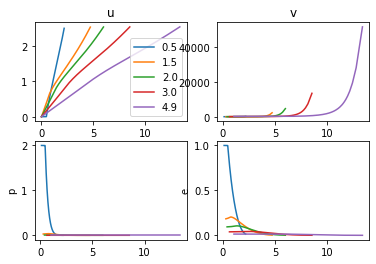

In [6]:
show_res(rs1, [int(tm / t_step) for tm in [.5, 1.5, 2, 3, 4.9]])

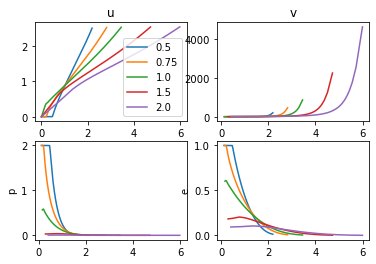

In [7]:
show_res(rs1, [int(tm / t_step) for tm in [.5, .75, 1, 1.5, 2]])

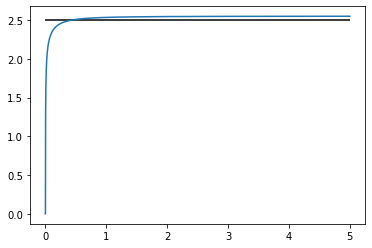

In [8]:
### Limit u
plt.plot([i * t_step for i in range(rs1['Nstep'])], [rs1['u'].get(i, rs1['N']) for i in range(rs1['Nstep'])])
plt.hlines(y = 2.5, xmin = 0, xmax = rs1['Nstep'] * t_step)

In [9]:
Nstep = rs1['Nstep']
N = rs1['N']
k = 0
for i in range(N):
    k = k + (rs1['r'].get(Nstep, i + 1) ** 3 - rs1['r'].get(Nstep, i) ** 3) / rs1['v'].get(Nstep, i + .5)
print('law 1', k)

k = 0
for i in range(N):
    k = k + (rs1['e'].get(Nstep, i + .5) + .5 * rs1['u'].get(Nstep, i + 1) ** 2) * (rs1['r'].get(Nstep, i + 1) ** 3 - rs1['r'].get(Nstep, i) ** 3) / rs1['v'].get(Nstep, i + .5)
print('law 2', k)



law 1 2.9999999999999654
law 2 2.999999228585122


In [10]:
def compare_res(rs1, rs2):
    fig, axs = plt.subplots(2, 2)
    n = int(rs1['u'].nmax)
    axs[0, 0].plot([rs1['r'].get(n, i) for i in range(rs1['N']+1)], [rs1['u'].get(n - .5, i) for i in range(rs1['N']+1)], label = 'rs 1')
    axs[0, 0].plot([rs2['r'].get(n, i) for i in range(rs2['N']+1)], [rs2['u'].get(n - .5, i) for i in range(rs2['N']+1)], label = 'rs 2')
    axs[0, 0].set_title('u')
    axs[0, 0].legend()
    axs[0, 1].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['v'].get(n, i -.5) for i in range(1, rs1['N']+1)])
    axs[0, 1].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['v'].get(n, i -.5) for i in range(1, rs2['N']+1)])
    axs[0, 1].set_title("v")
    axs[1, 0].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['p'].get(n, i - .5) for i in range(1, rs1['N']+1)])
    axs[1, 0].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['p'].get(n, i - .5) for i in range(1, rs2['N']+1)])
    axs[1, 0].set(ylabel  = 'p')
    axs[1, 1].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['e'].get(n, i - .5) for i in range(1, rs1['N']+1)])
    axs[1, 1].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['e'].get(n, i - .5) for i in range(1, rs2['N']+1)])
    axs[1, 1].set(ylabel  = 'e')
    plt.show()

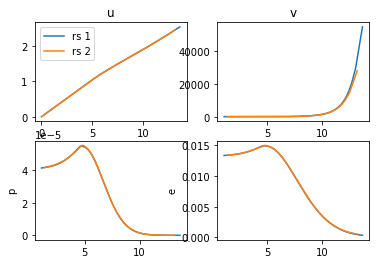

In [11]:
compare_res(rs1, rs2)

In [ ]:
rs = rs1

from celluloid import Camera
fig, axs = plt.subplots(2, 2)
camera = Camera(fig)
N = rs1['N']
r = rs1['r']
u = rs1['u']
v = rs1['v']
p = rs1['p']
e = rs1['e']
for n in range(rs1['Nstep']):
    axs[0, 0].plot([r.get(n, i) for i in range(N+1)], [u.get(n + .5, i) for i in range(N+1)], label = str(round(n * t_step, 2)))
    axs[0, 0].set_title('u')
    # axs[0, 0].legend()
    axs[0, 1].plot([r.get(n, i) for i in range(1, N+1)], [v.get(n, i -.5) for i in range(1, N+1)])
    axs[0, 1].set_title("v")
    axs[1, 0].plot([r.get(n, i) for i in range(1, N+1)], [p.get(n, i - .5) for i in range(1, N+1)])
    axs[1, 0].set(ylabel  = 'p')
    axs[1, 1].plot([r.get(n, i) for i in range(1, N+1)], [e.get(n, i - .5) for i in range(1, N+1)])
    axs[1, 1].set(ylabel  = 'e')
    camera.snap()
#     plt.show()
animation = camera.animate()  
animation.save('c:/tmp/celluloid_subplots.gif', writer = 'imagemagick')

KeyboardInterrupt: 

In [ ]:
# import matplotlib.animation as animation
anim = FuncAnimation(fig, show_res_n,
                               frames = range(int(rs1['u'].nmax) - 1), interval=20, blit=True)